In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats

In [2]:
df = pd.read_csv("NFLX_vs_DIS_Stock_Close_Prices.csv")
print(df.head())

       Date  DIS Close Price  NFLX Close Price
0  23-05-02            23.83             16.75
1  24-05-02            23.56             16.94
2  28-05-02            23.54             16.20
3  29-05-02            23.05             15.45
4  30-05-02            23.23             15.00


In [3]:
df['xy'] = df['DIS Close Price'] * df['NFLX Close Price']
df['DIS_squared'] = df['DIS Close Price'] ** 2
df['NFLX_squared'] = df['NFLX Close Price'] ** 2
df

,Date,DIS Close Price,NFLX Close Price,xy,DIS_squared,NFLX_squared
0,23-05-02,23.83,16.75,399.1525,567.8689,280.5625
1,24-05-02,23.56,16.94,399.1064,555.0736,286.9636
2,28-05-02,23.54,16.20,381.3480,554.1316,262.4400
3,29-05-02,23.05,15.45,356.1225,531.3025,238.7025
4,30-05-02,23.23,15.00,348.4500,539.6329,225.0000
...,...,...,...,...,...,...
5635,11-10-24,94.13,722.79,68036.2227,8860.4569,522425.3841
5636,14-10-24,94.97,713.00,67713.6100,9019.3009,508369.0000
5637,15-10-24,94.22,705.98,66517.4356,8877.4084,498407.7604
5638,16-10-24,96.75,702.00,67918.5000,9360.5625,492804.0000


In [4]:
n = len(df)
sum_x = df['DIS Close Price'].sum()
sum_y = df['NFLX Close Price'].sum()
sum_xy = (df['DIS Close Price'] * df['NFLX Close Price']).sum()
sum_x_squared = (df['DIS Close Price'] ** 2).sum()
sum_y_squared = (df['NFLX Close Price'] ** 2).sum()

r_numerator = n * sum_xy - sum_x * sum_y
r_denominator = np.sqrt((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))
r = r_numerator / r_denominator
print(f"Pearson Correlation Coefficient: {r}")

Pearson Correlation Coefficient: 0.7840568835979873


In [5]:
correlation_coefficient, p_value = pearsonr(df['DIS Close Price'], df['NFLX Close Price'])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a significant correlation between DIS Close Price and NFLX Close Price.")
else:
    print("There is no significant correlation between DIS Close Price and NFLX Close Price.")

Correlation Coefficient: 0.7840568835979869
P-value: 0.0
There is a significant correlation between DIS Close Price and NFLX Close Price.


Intercept (beta_0): -29.295322365638555
Slope (beta_1): 3.3153673119538194


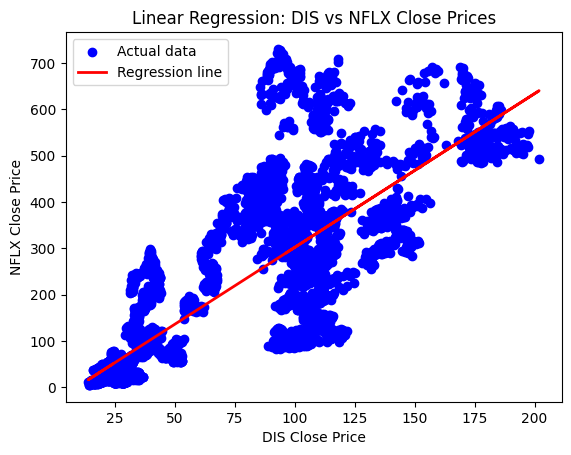

In [6]:
X = df['DIS Close Price'].values.reshape(-1, 1) 
Y = df['NFLX Close Price'].values  

model = LinearRegression()
model.fit(X, Y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('DIS Close Price')
plt.ylabel('NFLX Close Price')
plt.title('Linear Regression: DIS vs NFLX Close Prices')
plt.legend()
plt.show()

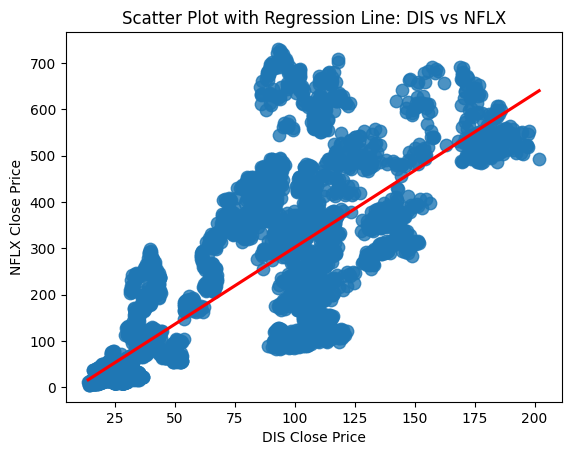

In [7]:
sns.regplot(
    x='DIS Close Price', 
    y='NFLX Close Price', 
    data=df, 
    ci=None, 
    scatter_kws={'s': 80}, 
    line_kws={'color': 'red'}
)

plt.xlabel('DIS Close Price')
plt.ylabel('NFLX Close Price')
plt.title('Scatter Plot with Regression Line: DIS vs NFLX')

plt.show()


In [8]:
b = (sum_xy - (sum_x * sum_y) / n) / (sum_x_squared - (sum_x ** 2) / n)
a = (sum_y / n) - b * (sum_x / n)

df['Predicted_NFLX_Close'] = a + b * df['DIS Close Price']

print(f"\nRegression Equation: NFLX Close Price = {a:.2f} + {b:.2f} * DIS Close Price")

specific_DIS = 150
predicted_NFLX = a + b * specific_DIS
print(f"Predicted NFLX Close Price when DIS Close Price is {specific_DIS}: {predicted_NFLX}")


Regression Equation: NFLX Close Price = -29.30 + 3.32 * DIS Close Price
Predicted NFLX Close Price when DIS Close Price is 150: 468.00977442743454


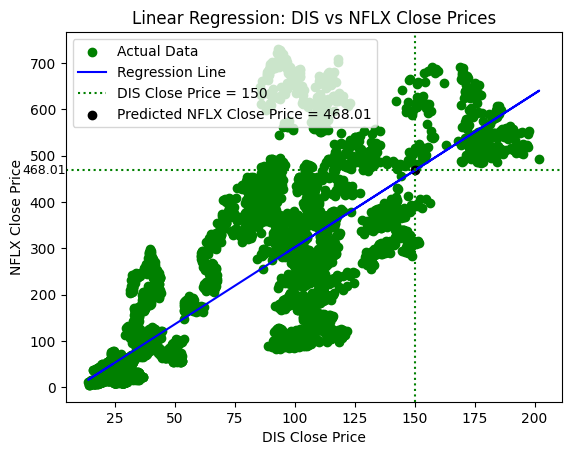

In [9]:
plt.scatter(df['DIS Close Price'], df['NFLX Close Price'], color='green', label='Actual Data')
plt.plot(df['DIS Close Price'], df['Predicted_NFLX_Close'], color='blue', label='Regression Line')

plt.axvline(x=specific_DIS, color='green', linestyle='dotted', label=f'DIS Close Price = {specific_DIS}')
plt.axhline(y=predicted_NFLX, color='green', linestyle='dotted')

plt.scatter(specific_DIS, predicted_NFLX, color='black', label=f'Predicted NFLX Close Price = {predicted_NFLX:.2f}')

plt.text(plt.gca().get_xlim()[0], predicted_NFLX, f'{predicted_NFLX:.2f}', 
         color='black', fontsize=9, va='center', ha='right')

plt.xlabel('DIS Close Price')
plt.ylabel('NFLX Close Price')
plt.title('Linear Regression: DIS vs NFLX Close Prices')
plt.legend()
plt.show()

Regression Slope: 3.32
Regression Intercept: -29.30
R-squared: 0.61
P-value: 0.00000


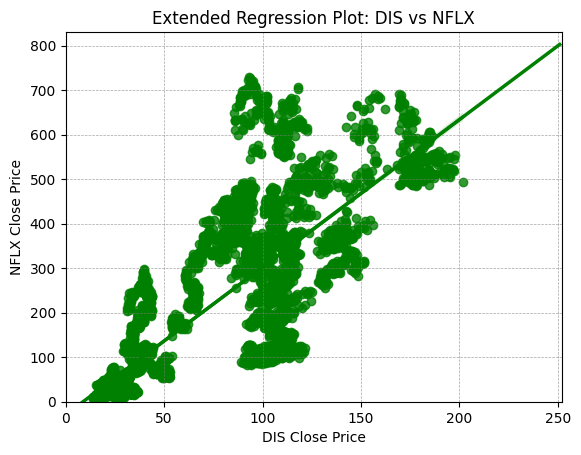

In [10]:
x = df['DIS Close Price']  
y = df['NFLX Close Price']  

ax = sns.regplot(x=x, y=y, color="g")

plt.xlim([0, max(x) + 50])  
plt.ylim([0, max(y) + 100]) 

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=x, y=y)

print(f"Regression Slope: {slope:.2f}")
print(f"Regression Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.5f}")

xlims = ax.get_xlim()  # Get current x-axis limits
new_x = np.arange(xlims[0], xlims[1], (xlims[1] - xlims[0]) / 250.) 
ax.plot(new_x, intercept + slope * new_x, color='g', linestyle='-', lw=2.5)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlabel('DIS Close Price')
plt.ylabel('NFLX Close Price')
plt.title('Extended Regression Plot: DIS vs NFLX')

plt.show()


In [11]:
x1 = df['DIS Close Price'] 
y = df['NFLX Close Price'] 

x = sm.add_constant(x1)

results = sm.OLS(y, x).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NFLX Close Price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     8996.
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:32:13   Log-Likelihood:                -34931.
No. Observations:                5640   AIC:                         6.987e+04
Df Residuals:                    5638   BIC:                         6.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -29.2953      2.960     -9.897      0.000     -35.098     -23.493
DIS Close Price     3.3154      0.035     94.850      0.000       3.247       3.384
==============================================================================
Omnibus:                      618.012   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.652
Skew:                           0.788   Prob(JB):                    1.87e-213
Kurtosis:                       4.299   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **OLS Regression Results**

#### **Model Fit:**
1. **R-squared (61.5%)**:  
   - Indicates that 61.5% of the variation in Netflix's stock price is explained by Disney's stock price.  
   - **Concept**: R-squared measures how well the independent variable explains the dependent variable. A higher value means a better fit.

2. **Adjusted R-squared (61.5%)**:  
   - Considers the number of predictors in the model. Since there's only one predictor here, it remains the same as R-squared.  
   - **Concept**: Adjusted R-squared prevents overestimation of the model fit by penalizing the addition of unnecessary predictors.

---

#### **Coefficients:**
1. **Intercept (const = -29.2953)**:  
   - The estimated value of Netflix's stock price when Disney's stock price is zero. This value is not meaningful in a real-world context but is mathematically necessary for the regression equation.  
   - **Concept**: The intercept represents the baseline value of the dependent variable when all predictors are zero. Its practicality depends on the scenario.

2. **DIS Close Price Coefficient (3.3154)**:  
   - For every 1 unit increase in Disney's stock price, Netflix's stock price increases by approximately 3.3154 units.  
   - **Concept**: Coefficients quantify the effect of a one-unit change in the predictor on the outcome. Positive coefficients indicate a direct relationship, while negative ones show an inverse relationship.

---

#### **P-Values (Hypothesis Testing):**
1. **Intercept (p = 0.000)** and **DIS Close Price (p = 0.000)**:  
   - Both are highly significant (p < 0.05), meaning we reject the null hypothesis (that these coefficients are zero).  
   - **Concept**: P-values test the significance of predictors. Low values suggest the variable has a meaningful impact on the outcome.
   -
   
3. **Hypotheses**:
   - **Null Hypothesis (H₀):** The coefficient of the predictor is zero (no /effect relationship).  
   - **Alternative Hypothesis (H₁):** The coefficient of the predictor is not zero (there is an effect/relationship).
       
   - Rejecting H₀ indicates the predictor contributes to explaining the dependent variable.

---

#### **Conclusion:**
- The model explains 61.5% of the variation in Netflix's stock price (R-squared).  
- Disney's stock price is a significant predictor (low p-value) of Netflix's stock price.  
- **Concept Recap**:
  - **R-squared**: Goodness of fit.
  - **Coefficients**: Magnitude and direction of the predictor's effect.
  - **P-values**: Statistical significance of the predictors.  

This analysis confirms a strong, statistically significant relationship between Disney and Netflix stock prices.